In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
from sklearn import tree
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
df=pd.read_csv('./data.csv',encoding='cp949')
df=df.replace('low',0)
df=df.replace('mid',1)
df=df.replace('high',2)
df.to_csv('./정제된데이터.csv', encoding='cp949',index=False)
df=df.replace('A',0) #범주형 자료 해석 x ->  sklearn.preprocessing.OneHotEncoder 쓰거나 dummy encoding을 활용
df=df.replace('B',1)
df=df.replace('C',2)
df=df.replace('D',3)
df=df.replace('E',4)
df=df.replace('F',5)
df=df.replace('G',6)
df=df.replace('H',7)
df=df.replace('디저트',0)
df=df.replace('호텔/숙박',1)
df=df.replace('항공/여행사',2)
df=df.replace('취미',3)
df=df.replace('할인점',4)
df=df.replace('뷰티',5)
df=df.replace('면세점',6)
df=df.replace('종합몰',7)
df=df.replace('오픈마켓/소셜',8)
df=df.replace('전문몰',9)
print(df)

         cst_id_di   VAR002  VAR003   VAR004   VAR005   VAR006  VAR007  \
0      90000000089 -0.06610  0.5280 -0.13607  0.10945  0.06557       0   
1      90000000176 -0.09537  0.1347 -0.13541  0.17331 -0.19657       0   
2      90000000210 -0.01048  0.8360  0.37797 -0.10970  0.52032       1   
3      90000000212  0.05194  0.7505  0.04611 -0.16512  0.07413       0   
4      90000000213 -0.08536  0.3767 -0.12288  0.10023 -0.43414       0   
...            ...      ...     ...      ...      ...      ...     ...   
10119  90000460112 -0.06606  0.6615 -0.09743 -0.03240  0.10111       0   
10120  90000460117 -0.03031  0.0143  0.07041 -0.02519  0.58013       0   
10121  90000460233 -0.05351  0.3121  0.36925 -0.10039  0.51159       0   
10122  90000460310 -0.00562  0.2286  0.04581 -0.05390  0.20481       0   
10123  90000460313 -0.06814  0.6968 -0.04318  0.11340 -0.08842       0   

       VAR008   VAR009  VAR010  ...   VAR219   VAR220   VAR221   VAR222  \
0      0.7702 -0.18965  0.1981  ... 

In [2]:


Y=df['MRC_ID_DI']
del df['MRC_ID_DI']
X =df

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf.fit(X_train,Y_train)
print(round(clf.score(X_test,Y_test),2)*100,"%")
print("특성 중요도 : \n{}".format(clf.feature_importances_))
print(clf.feature_importances_)
list(df.columns.array)


imp = clf.feature_importances_
if platform.system() == 'Windows':
    font_name= font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')


80.0 %
특성 중요도 : 
[0.         0.         0.         0.00915515 0.         0.
 0.         0.         0.         0.00797374 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04328534
 0.         0.         0.01246327 0.         0.         0.
 0.00812277 0.         0.         0.         0.         0.
 0.         0.         0.         0.01888734 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04185979 0.         0.         0.         0.
 0.         0.         0.01200602 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00993191 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

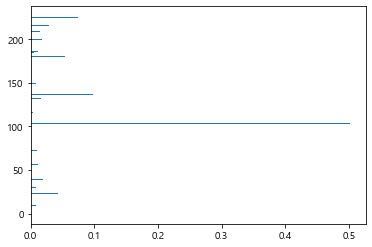

In [3]:
plt.barh(range(len(imp)), imp) 
#plt.yticks(range(len(imp)), list(df.columns.array)) 
plt.show()

In [4]:
a=imp.tolist()

In [6]:
for i in range(0,len(a)):
    if a[i]>0.05:
        print('VAR' + str(i+1) , a[i])

VAR104 0.5009772637494204
VAR138 0.09828873147311046
VAR181 0.05330212778462214
VAR226 0.07494632714082188
